# Customer Personality Analysis

Author: Aner Huang

Course Project, UC Irvine, Math 10, F22

## Introduction

- <font color = Brown>For this project, I chose "Customer Personality Analysis." It is about the detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. Since it contains a lot of factor to analyze, I only focus on the catalog of "people", including "Age", "Income", "Education",and "Marital_status". 

## Section 1: Overview and Clean Dataset

- To begin, I will firstly import some packages that I am going to use in this project and analysis. 

- Then, I will load my dataset and show some basic information of my dataset. 



In [46]:
import pandas as pd
import numpy as np

In [2]:
# Read the dataset
df=pd.read_csv("Costomer_Personality.csv")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
# Dimension of dataset
df.shape

(2240, 29)

In [4]:
# Counting numbers of missing values in each column
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- We can see that we have 24 missing values in the colume "Income", we can fill these bad datas as the median of the colume of "Income" using `fillna`  

In [5]:
df['Income']=df['Income'].fillna(df['Income'].median())

## Section1.1: A Brief Introduction of Dataset
- In order for us to better analyze this dataset, I will make a better clear names for those columns that have an ambiguious name and I will also clarity the meaning of each columns for people to understand.
- For the following, I normalize the dataset by using the method of `rename`.

In [6]:
# List out all the names of columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# Normalizing Dataset
df.rename({"Dt_Customer ":"Date","MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold","NumDealsPurchases":"Deals","NumWebPurchases":"Web","NumCatalogPurchases":"Catalog","NumWebVisitsMonth":"WebVisit"},axis=1,inplace=True)

- Create another feature "Total" indicating the total amount spent by the customer in various categories over the span of two years.
- Classify the objects in "Marital_Status" to extract the living situation of couples.
- Dropping some of the redundant features and other features that I am not going to analyze in this project using `drop`. 

In [8]:
df["Total"] = df["Wines"]+df["Fruits"]+df["Meat"]+df["Fish"]+df["Sweet"]+df["Gold"]
df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Relationship', 'Together':'Relationship','Divorced':'Alone','Widow':'Alone','YOLO':'Alone', 'Absurd':'Alone'})
to_drop = ["Kidhome","Teenhome", "Z_CostContact", "Z_Revenue"]
df = df.drop(to_drop, axis=1)

**Brief Introduction of Columns:**
<font color=brown>
- People:
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Date: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products:
Wines: Amount spent on wine in last 2 years
Fruits: Amount spent on fruits in last 2 years
Meat: Amount spent on meat in last 2 years
Fish: Amount spent on fish in last 2 years
Sweet: Amount spent on sweets in last 2 years
Gold: Amount spent on gold in last 2 years

- Promotion:
Deals: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place: 
Web: Number of purchases made through the company’s website
Catalog: Number of purchases made using a catalogue
Store: Number of purchases made directly in stores
WebVisits: Number of visits to company’s website in the last month

In [9]:
# Description of Data
df.describe()

ID   Year_Birth         Income      Recency        Wines  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446    49.109375   303.935714   
std     3246.662198    11.984069   25037.955891    28.962453   336.597393   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000    24.000000    23.750000   
50%     5458.500000  1970.000000   51381.500000    49.000000   173.500000   
75%     8427.750000  1977.000000   68289.750000    74.000000   504.250000   
max    11191.000000  1996.000000  666666.000000    99.000000  1493.000000   

            Fruits         Meat         Fish        Sweet         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       NumStorePurchases     WebVisit  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000  2240.000000   2240.000000   2240.000000   
mean            5.790179     5.316518      0.072768      0.074554   
std             3.250958     2.426645      0.259813      0.262728   
min             0.000000     0.000000      0.000000      0.000000   
25%             3.000000     3.000000      0.000000      0.000000   
50%             5.000000     6.000000      0.000000      0.000000   
75%             8.000000     7.000000      0.000000      0.000000   
max            13.000000    20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2240.000000   2240.000000   2240.000000  2240.000000  2240.000000   
mean       0.072768      0.064286      0.013393     0.009375     0.149107   
std        0.259813      0.245316      0.114976     0.096391     0.356274   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

             Total  
count  2240.000000  
mean    605.798214  
std     602.249288  
min       5.000000  
25%      68.750000  
50%     396.000000  
75%    1045.500000  
max    2525.000000  

[8 rows x 23 columns]

## Section2: The Relationships between Customer's life status and Total Amount of Purchase

### 2.1. Generation

- For this section, I am interested in analyzing the relationship between Costomer's Age and the total purchases they made. 
- For total purchases, I will need to make a new column contains the total number they purchased in the last two year by adding up the amount of Wines, Fruits, Meat, Fish, Sweet, and Gold. 
- I will also create a new column "Age" represents customer's age also a "generation" column represents customer's generation and narrow the range to the age under 80, thus we will also have generation 2-7. 
- I will also include charts about the distribution of different generation.

In [10]:
#Current year minus the year of birth will be the age of customers 
df["Age"] = 2022-df["Year_Birth"]
df = df[df["Age"]<80] #Narrow my age range

- Using `map` method to create a new column called "Generation" to specify different age group. 
- But first, I would need to make the "Age" column becomes 'str' instead of 'int', so the numbers in the "Age" column does not have any numerical meaning, instead it will represents the age group.

In [45]:
df["Age"]=df["Age"].apply(str)
df["Generation"] = df["Age"].map(lambda x: x[:1])

In [12]:
df.groupby("Generation", sort=True).mean()

ID   Year_Birth        Income    Recency       Wines  \
Generation                                                                  
2           6322.066667  1994.266667  63576.866667  48.466667  357.133333   
3           5768.597902  1986.580420  44734.256993  48.597902  236.062937   
4           5525.400000  1976.875806  49610.597581  48.641935  243.335484   
5           5452.600000  1968.069355  51744.570161  49.272581  309.001613   
6           5710.436559  1957.479570  57179.921505  50.094624  374.451613   
7           5617.890830  1949.266376  59004.475983  48.240175  389.384279   

               Fruits        Meat       Fish      Sweet       Gold  ...  \
Generation                                                          ...   
2           43.266667  341.800000  93.733333  46.066667  69.466667  ...   
3           27.716783  177.961538  33.734266  28.678322  42.465035  ...   
4           23.079032  146.127419  34.843548  24.658065  37.869355  ...   
5           26.140323  152.582258  34.350000  25.474194  44.366129  ...   
6           27.636559  183.632258  42.415054  29.167742  47.741935  ...   
7           29.615721  201.122271  44.572052  30.633188  52.218341  ...   

            NumStorePurchases  WebVisit  AcceptedCmp3  AcceptedCmp4  \
Generation                                                            
2                    6.533333  3.533333      0.133333      0.066667   
3                    5.174825  5.541958      0.104895      0.045455   
4                    5.350000  5.622581      0.087097      0.053226   
5                    5.746774  5.554839      0.062903      0.083871   
6                    6.372043  4.888172      0.055914      0.101075   
7                    6.689956  4.589520      0.052402      0.091703   

            AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Generation                                                                 
2               0.266667      0.133333      0.066667  0.066667  0.333333   
3               0.108392      0.090909      0.010490  0.010490  0.185315   
4               0.064516      0.053226      0.006452  0.009677  0.135484   
5               0.051613      0.043548      0.016129  0.001613  0.145161   
6               0.070968      0.079570      0.023656  0.012903  0.141935   
7               0.091703      0.082969      0.004367  0.013100  0.157205   

                 Total  
Generation              
2           951.466667  
3           546.618881  
4           509.912903  
5           591.914516  
6           705.045161  
7           747.545852  

[6 rows x 23 columns]

In [13]:
df["Generation"].value_counts()

4    620
5    620
6    465
3    286
7    229
2     15
Name: Generation, dtype: int64

In [14]:
# Using groupby to find out the distribution of the custormers' generation.
for gp, df_mini in df.groupby("Generation"):
    print(f"The generation is {gp} and the number of rows is {df_mini.shape[0]}.")

The generation is 2 and the number of rows is 15.
The generation is 3 and the number of rows is 286.
The generation is 4 and the number of rows is 620.
The generation is 5 and the number of rows is 620.
The generation is 6 and the number of rows is 465.
The generation is 7 and the number of rows is 229.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


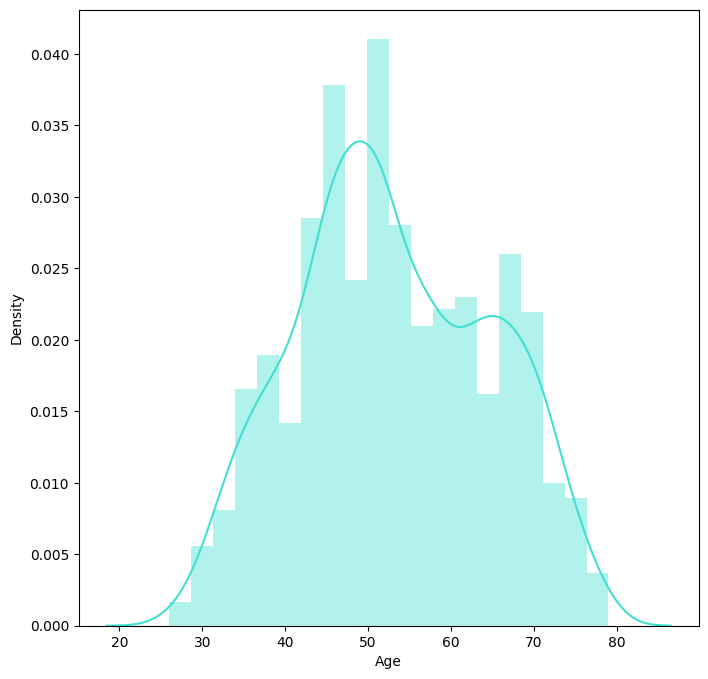

In [16]:
#Plot of the distribution of generation
plt.figure(figsize=(8,8))
sns.distplot(df["Age"],color = 'turquoise')
plt.show()

- As we can see from the `groupby` method, generation 4,5,and 6 contains a larger portion of customers. And later, I double check with the plot chart to see its indeed Customer's age around 40-50 goes to the peak.

**Customer's income**
- Then, I want to see the relationship between customer's income and the total amount of purchases they made.
- Before that, I would like to narrow down the range of income, in case that the number is too large to considered as outliers. 

In [17]:
df = df[df["Income"]<100000]

In [18]:
import altair as alt
brush = alt.selection_interval()
c1 = alt.Chart(df).mark_circle().encode(
    x=alt.X('Income', scale=alt.Scale(zero=False)),
    y='Total',
    color='Generation:N',
    tooltip=["ID", "Income", "Total"]
).add_selection(brush)

c2= alt.Chart(df).mark_bar().encode(
    x = 'ID',
    y='Total'
).transform_filter(brush)

c1|c2

alt.HConcatChart(...)

<font color=red>Conclusion: We can see from this chart that there might be a positive relationship between the customers' income and their total purchase. Later, I will use. regression to see if there's a relation lie between them.

## Linear and Polynomial Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(df[["Income"]], df["Total"])
df["Pred"]=reg.predict(df[["Income"]]) 
df.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation         Single  58138.0  04-09-2012       58   
1  2174        1954  Graduation         Single  46344.0  08-03-2014       38   
2  4141        1965  Graduation   Relationship  71613.0  21-08-2013       26   
3  6182        1984  Graduation   Relationship  26646.0  10-02-2014       26   
4  5324        1981         PhD   Relationship  58293.0  19-01-2014       94   

   Wines  Fruits  Meat  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0    635      88   546  ...             0             0             0   
1     11       1     6  ...             0             0             0   
2    426      49   127  ...             0             0             0   
3     11       4    20  ...             0             0             0   
4    173      43   118  ...             0             0             0   

   AcceptedCmp2  Complain  Response  Total  Age  Generation         Pred  
0             0         0         1   1617   65           6   764.700135  
1             0         0         0     27   68           6   479.933385  
2             0         0         0    776   57           5  1090.054719  
3             0         0         0     53   38           3     4.324138  
4             0         0         0    422   41           4   768.442619  

[5 rows x 29 columns]

In [20]:
c = alt.Chart(df).mark_circle().encode(
    x=alt.X('Income', scale=alt.Scale(zero=False)),
    y=alt.Y('Total', scale=alt.Scale(zero=False)),
    color="ID"
)
c1=alt.Chart(df).mark_line(color="red").encode(
    x=alt.X('Income', scale=alt.Scale(zero=False)),
    y="Pred"
)
c+c1

alt.LayerChart(...)

<font color=red>By the graph above, we can easily confirm that there is a positive trend between customers' income and total amount of purchase. 

In [21]:
df["I2"]=df["Income"]**2
df["I3"]=df["Income"]**3
poly_cols = ["Income","I2", "I3"]
reg2 = LinearRegression()
reg2.fit(df[poly_cols], df["Total"])
df["poly_pred"] = reg2.predict(df[poly_cols])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [22]:
c = alt.Chart(df).mark_circle().encode(
    x=alt.X('Income', scale=alt.Scale(zero=False)),
    y=alt.Y('Total', scale=alt.Scale(zero=False)),
    color="ID"
)

c1 = alt.Chart(df).mark_line(color="black").encode(
    x=alt.X('Income', scale=alt.Scale(zero=False)),
    y="poly_pred"
)

c+c1

alt.LayerChart(...)

<font color=red>Using polynomial regression to check, we can see the line it's not strictly positive or negative, but its mostly positive. 

## Logistic Regression

- For this section, I want to add one feature in our analysis: "Marital_Status". I am interested in predicting the customer' marital status by their income and total amount spent on products. 

In [23]:
from sklearn.linear_model import LogisticRegression #import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
# Make a sub-dataframe that only containes the necessary input that we want to predict
cols = ["Income","Total"]
df["Rel1"]=(df["Marital_Status"]== "Relationship") #Make the new colnmn that returns "True" if the customer is in a relationship, otherwise returns "False".

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- Because our original dataset has a large sample size, making a train_test_split to divide dataset would make better and more accurate prediction. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], df["Rel1"], test_size=0.4, random_state=0)

In [26]:
clf=LogisticRegression()
clf.fit(X_train, y_train) #fit
(clf.predict(X_test) == y_test).sum() # Frequency 

565

In [27]:
# The proportion that we made correct prediction based on the whole dataset.
(clf.predict(X_test) == y_test).sum()/len(X_test)

0.6355455568053994

- The following step is to make sure that we get the right coefficient by specifing the index.

In [28]:
clf.coef_
Income_coef,Total_coef=clf.coef_[0]
Total_coef

-0.000449150869429734

- From the coefficient that we get from the logistic prediction, we can tell that there is little relationship between the input:Income and Total with the output:Maritial_Status. Thus, it means it might not be higher income and more total will indicate if a customeris in a relationship. 

- <font color = brown>Q:What will our model predict if we have the income for 71613 and the total amount is 776?

In [29]:
sigmoid = lambda x: 1/(1+np.exp(-x))
Income = 71613
Total = 776
sigmoid(Income_coef*Income+Total_coef*Total+clf.intercept_)

array([0.69477663])

<font color=red> Therefore,our model predicts that this customer with(income is $71613 and total is 776) has a 69.5% chance of being in a relationship. 
- <font color=black>Then we will double check with predict_proba.

In [30]:
clf.predict_proba([[Income,Total]]) 

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.30522337, 0.69477663]])

- The first array says that there is a 30.5% chance of this customer to be single(not in a relationship), and the second array gives the same result as the sigmoid function gives.

## K-nearest Neighbor Classification

In [31]:
#Import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss

In [32]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
loss_train=log_loss(y_train, clf.predict_proba(X_train))
loss_test=log_loss(y_test,clf.predict_proba(X_test))

In [33]:
loss_train

0.5008396930029373

The log loss for x_train and y_train is about 0.501. 

In [34]:
loss_test

2.4543962118660634

The log loss for x_test and y_test is about 2.454. 
- Therefore, we can see that loss_test is larger than loss_train, indicating a sign of over-fitting. 

## Decision Tree Classification

**Customer's Eduction**
- Next, I will use Machine Learning: Decision Tree Classfier in order to use customer's income, generation, and total amount of purchase to predict their education level.

In [35]:
# Import
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Normalize the "Education" column
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
input = ["Income","Total","Generation"]
X =df[input]
y = df["Education"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=49196138)

In [47]:
clf = DecisionTreeClassifier(max_leaf_nodes=8)
clf.fit(X_train, y_train) # Fit the classifier to the training data using X for the input features and using "Education" for the target.

DecisionTreeClassifier(max_leaf_nodes=8)

In [40]:
clf.score(X_train, y_train)

0.5476369092273068

In [41]:
clf.score(X_test, y_test)

0.4904386951631046

In [42]:
# Illustrate the resulting tree using matplotlib. 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

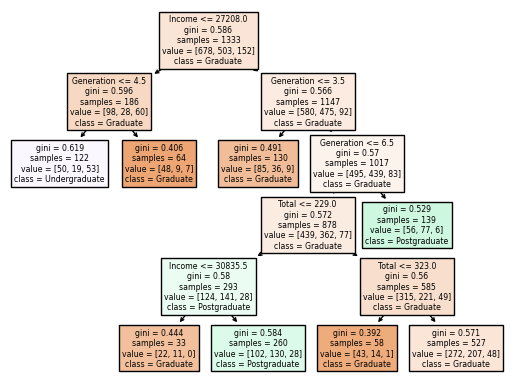

In [43]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

In [48]:
clf.feature_importances_

array([0.46173322, 0.17048733, 0.36777944])

In [50]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_)

Income        0.461733
Total         0.170487
Generation    0.367779
dtype: float64

Feature importance is a score assigned to the features of a Machine Learning model that defines how “important” is a feature to the model's prediction. The feature_importance for Income, Total,and Generation are: 0.462, 0.170, and 0.368. Thus, we can know that "Income" is the most important feature to predict our model's prediction. 

## Summary
    For this project, I first make a graph to show the distribution of the customer's generation. Then I used different regresion, including linear, polynomial, and logitic to show if there's relation between one's income and one's total amount of purchase. And the results showed that there's a position relationship between them. Later, I found out that Income is the the most significant feature to include when I want to predict our model's prediction for education. 

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

Customer Personality Analysis: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount. 

* List any other references that you found helpful.

Reference of code of logic regression: Course Notes from Spring 2022: https://christopherdavisuci.github.io/UCI-Math-10-S22/Week7/Week7-Friday.html .
Reference of code of K-Nearest Neighbor regression: Course Notes from Winter 2022: 
https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html . 
Reference for interactivity altair chart: https://altair-viz.github.io/altair-tutorial/notebooks/06-Selections.html. 
Reference for Decision Tree Classification and feature_importance: Week 8 Friday lecture: https://deepnote.com/workspace/math-10-f22-9ae9e411-d47b-4572-803e-16ff3e4d5a91/project/Week-8-Friday-12247a05-0b55-4f3c-b8d4-d2ccff50a983/notebook/Week8-Friday-59883ec6c3aa4332a20da4d2653f85e1.


## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e282459e-3f53-4ab2-8b4f-82627aafe86f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>